In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# File path
file_path = r"C:\Users\SANJU NP\Downloads\archive\ecommerce_synthetic_dataset.csv"

# Load dataset
df = pd.read_csv(file_path)


In [7]:
# Overview
print("Shape:", df.shape)
df.info()
df.head()

Shape: (100000, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   UserID              100000 non-null  int64  
 1   UserName            100000 non-null  object 
 2   Age                 100000 non-null  int64  
 3   Gender              100000 non-null  object 
 4   Country             100000 non-null  object 
 5   SignUpDate          100000 non-null  object 
 6   ProductID           100000 non-null  int64  
 7   ProductName         100000 non-null  object 
 8   Category            100000 non-null  object 
 9   Price               100000 non-null  float64
 10  PurchaseDate        100000 non-null  object 
 11  Quantity            100000 non-null  int64  
 12  TotalAmount         100000 non-null  float64
 13  HasDiscountApplied  100000 non-null  bool   
 14  DiscountRate        100000 non-null  float64
 15  ReviewScore    

,UserID,UserName,Age,Gender,Country,SignUpDate,ProductID,ProductName,Category,Price,...,Quantity,TotalAmount,HasDiscountApplied,DiscountRate,ReviewScore,ReviewText,LastLogin,SessionDuration,DeviceType,ReferralSource
0,1,User_1,39,Male,UK,2021-02-01,8190,Shoes,Books,532.37,...,1,532.37,False,0.02,5.1,Excellent,2024-05-03 04:04:27.591583,45.02,Mobile,Social Media
1,2,User_2,25,Female,Canada,2020-12-04,9527,T-shirt,Accessories,848.83,...,1,848.83,True,0.29,5.1,Excellent,2024-08-31 04:04:27.591606,13.83,Mobile,Social Media
2,3,User_3,43,Male,Canada,2022-07-08,3299,Headphones,Apparel,64.88,...,2,129.76,False,0.03,3.2,Good,2024-07-28 04:04:27.591611,59.09,Tablet,Organic Search
3,4,User_4,44,Male,Germany,2021-06-07,8795,T-shirt,Apparel,465.08,...,2,930.16,False,0.23,4.3,Good,2024-03-11 04:04:27.591615,55.42,Desktop,Email Marketing
4,5,User_5,23,Female,Canada,2021-11-06,1389,Shoes,Books,331.82,...,1,331.82,False,0.02,5.1,Average,2024-07-02 04:04:27.591619,14.99,Tablet,Email Marketing


In [8]:
## 3. Data Cleaning & Preprocessing

# Remove duplicates
df = df.drop_duplicates()

In [9]:
# Handle missing values
print("Missing values:\n", df.isnull().sum())
df = df.dropna(how='all')

Missing values:
 UserID                0
UserName              0
Age                   0
Gender                0
Country               0
SignUpDate            0
ProductID             0
ProductName           0
Category              0
Price                 0
PurchaseDate          0
Quantity              0
TotalAmount           0
HasDiscountApplied    0
DiscountRate          0
ReviewScore           0
ReviewText            0
LastLogin             0
SessionDuration       0
DeviceType            0
ReferralSource        0
dtype: int64


In [10]:
# Convert date column
if 'PurchaseDate' in df.columns:
    df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')

In [11]:
# Derived column: Revenue
if {'Quantity', 'Price'}.issubset(df.columns):
    df['Revenue'] = df['Quantity'] * df['Price']



In [12]:
# Extract time features
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])
df['YearMonth'] = df['PurchaseDate'].dt.to_period('M')
df['Weekday'] = df['PurchaseDate'].dt.day_name()


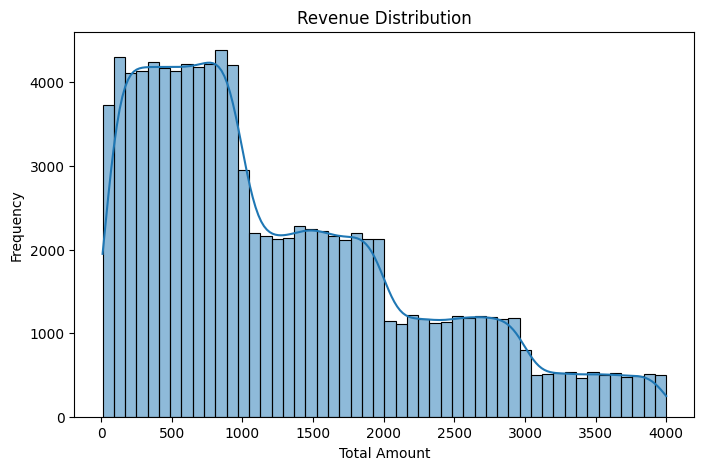

In [13]:
# Revenue distribution
plt.figure(figsize=(8,5))
sns.histplot(df['TotalAmount'], bins=50, kde=True)
plt.title("Revenue Distribution")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()




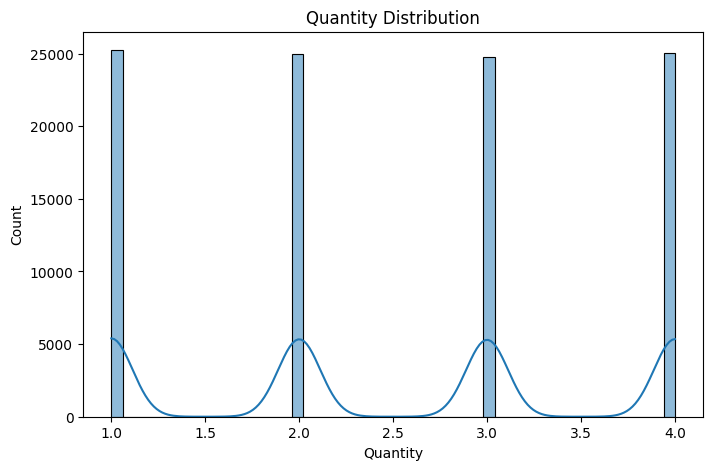

In [14]:
# Quantity distribution
plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title("Quantity Distribution")
plt.show()

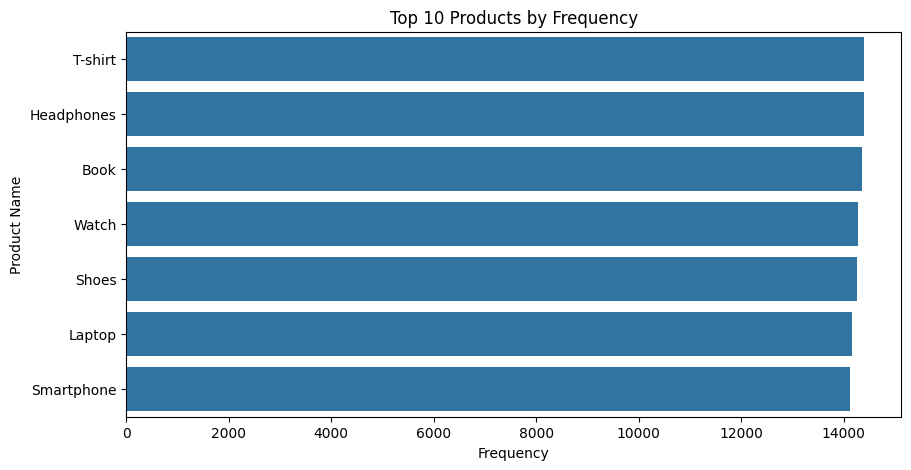

In [15]:
#Top 10 products by frequency
if 'ProductName' in df.columns:
    top_products = df['ProductName'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=top_products.values, y=top_products.index)
    plt.title("Top 10 Products by Frequency")
    plt.xlabel("Frequency")
    plt.ylabel("Product Name")
    plt.show()


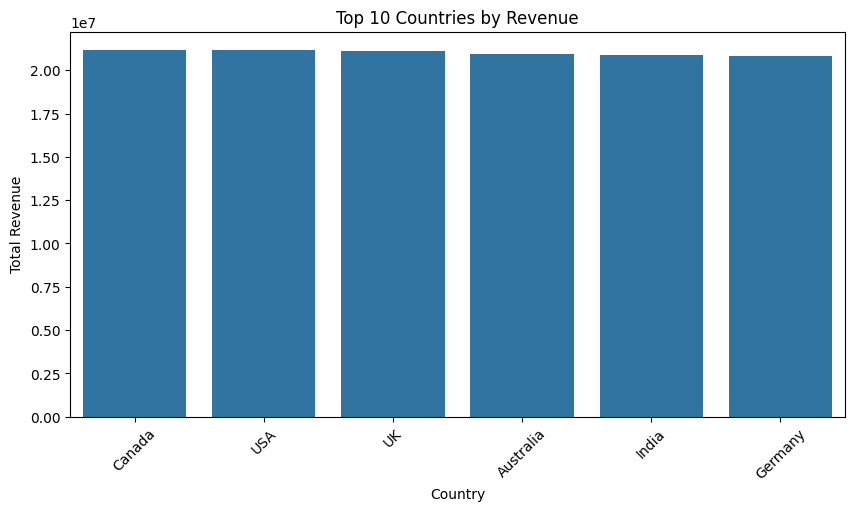

In [16]:
# Revenue by Country
if 'Country' in df.columns:
    country_rev = df.groupby('Country')['TotalAmount'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(10,5))
    sns.barplot(x=country_rev.index, y=country_rev.values)
    plt.title("Top 10 Countries by Revenue")
    plt.xlabel("Country")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45)
    plt.show()


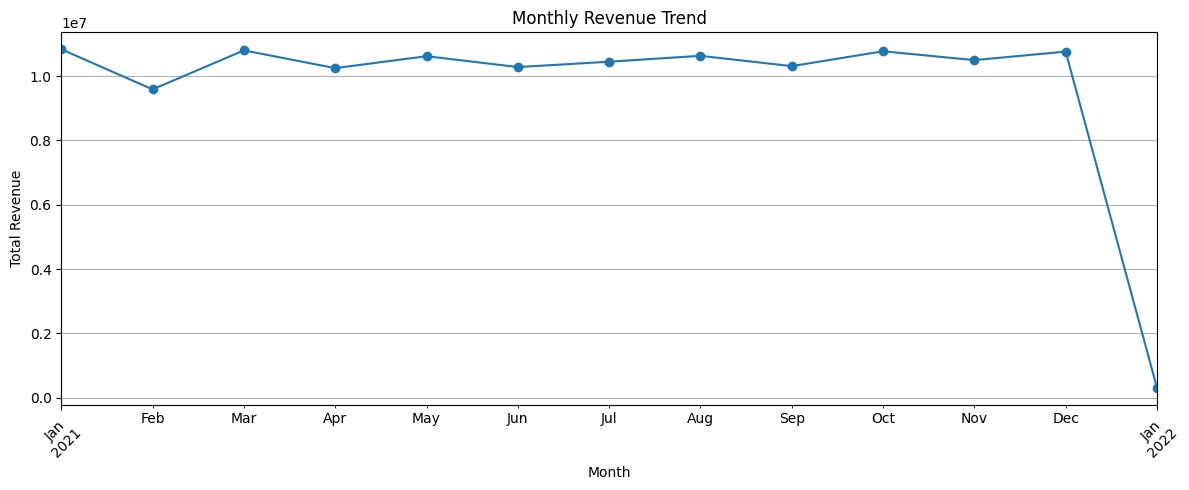

In [17]:
# Monthly revenue trend
if 'YearMonth' in df.columns:
    monthly_rev = df.groupby('YearMonth')['TotalAmount'].sum()
    monthly_rev.plot(kind='line', marker='o', figsize=(12,5), title="Monthly Revenue Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


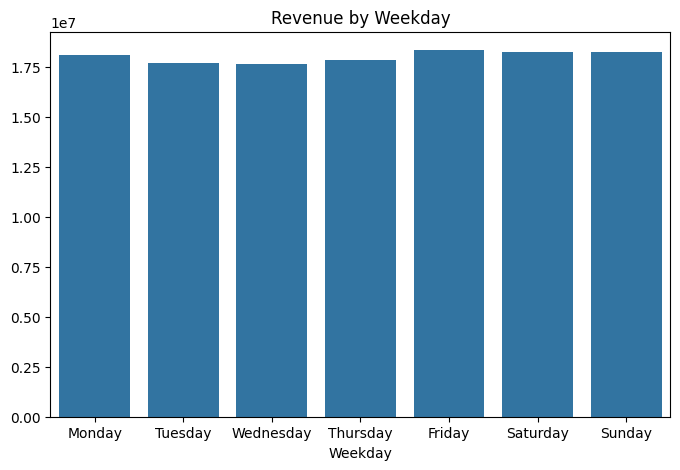

In [18]:
# Revenue by weekday
if 'Weekday' in df.columns:
    weekday_rev = df.groupby('Weekday')['Revenue'].sum().reindex(
        ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
    plt.figure(figsize=(8,5))
    sns.barplot(x=weekday_rev.index, y=weekday_rev.values)
    plt.title("Revenue by Weekday")
    plt.show()

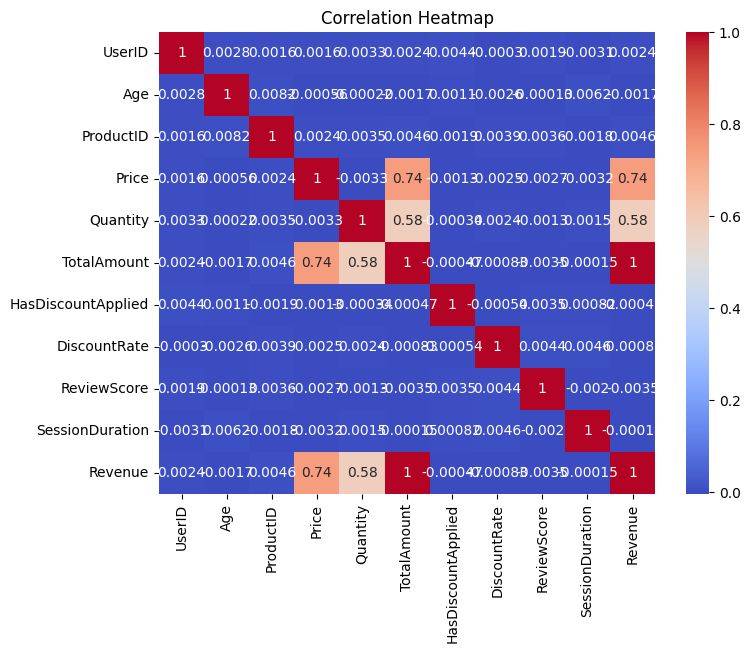

In [19]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

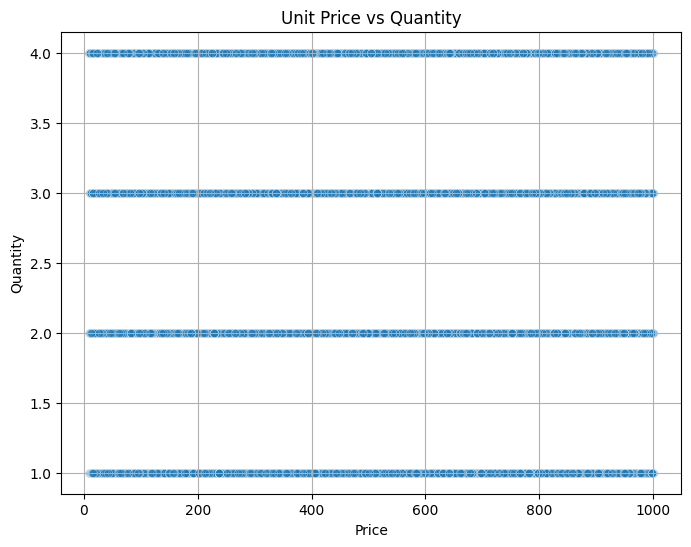

In [20]:
# Scatter: Price vs Quantity
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Price', y='Quantity', alpha=0.5)
plt.title("Unit Price vs Quantity")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.grid(True)
plt.show()


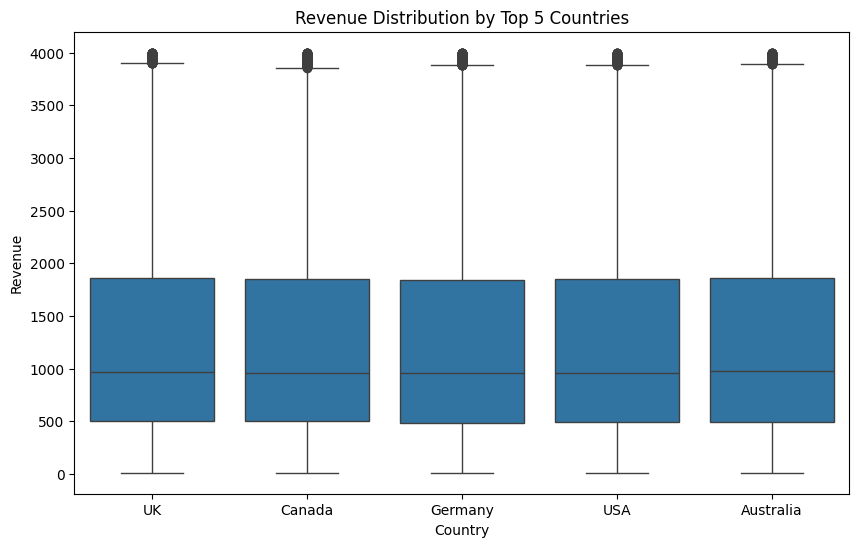

In [21]:
# Boxplot: Revenue by Country (Top 5)
if 'Country' in df.columns:
    top5 = df['Country'].value_counts().head(5).index
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[df['Country'].isin(top5)], x='Country', y='Revenue')
    plt.title("Revenue Distribution by Top 5 Countries")
    plt.show()